In [30]:
%matplotlib notebook

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [8]:
import math

In [7]:
test = 1000
_eval = 150
noise = 0.1

In [27]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [10]:
def generate(samples, noises):
    X = np.random.rand(samples) * 10 - 5
    X = np.sort(X).ravel()
    Y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + np.random.normal(0, noises, samples)
    X = X.reshape((samples, 1))
    return X, Y

In [12]:
x_train, y_train = generate(samples=_eval, noises=noise)

In [13]:
x_test, y_test = generate(samples=test, noises=noise)

In [22]:
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier()
dtr_r = DecisionTreeRegressor(random_state=125)
gr_r = GradientBoostingRegressor(n_estimators=100, subsample=0.5, random_state=125)

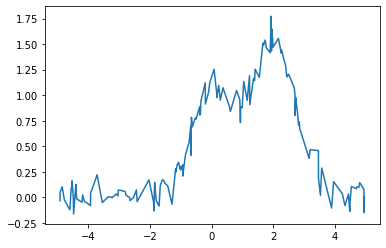

In [21]:
plt.plot(x_train, y_train)

In [23]:
dtr_r.fit(x_train, y_train)
gr_r.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=125, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
tree_predict = dtr_r.predict(x_test)
grad_predict = gr_r.predict(x_test)

## Decision Tree

<IPython.core.display.Javascript object>


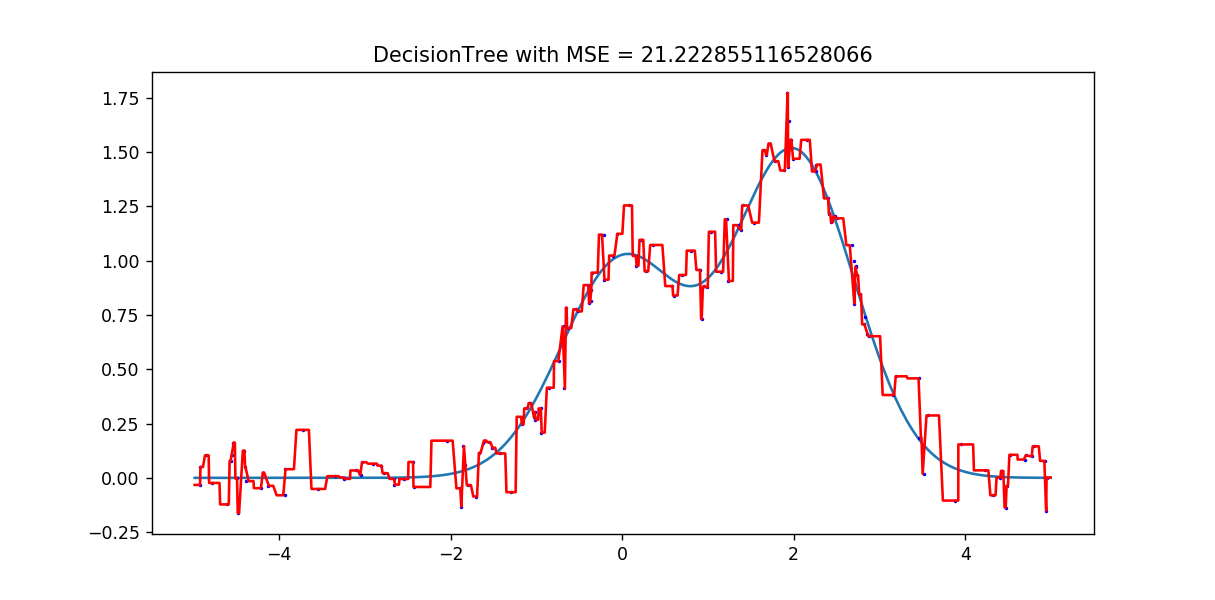

Text(0.5, 1.0, 'DecisionTree with MSE = 21.222855116528066')

In [38]:
plt.plot(x_test, f(x_test))
plt.plot(x_train, y_train, 'bo', markersize=1)
plt.plot(x_test, tree_predict, 'r')
mse = np.sum((y_test - tree_predict) ** 2)
plt.title('DecisionTree with MSE = {0}'.format(mse))

## Grad Boost

<IPython.core.display.Javascript object>


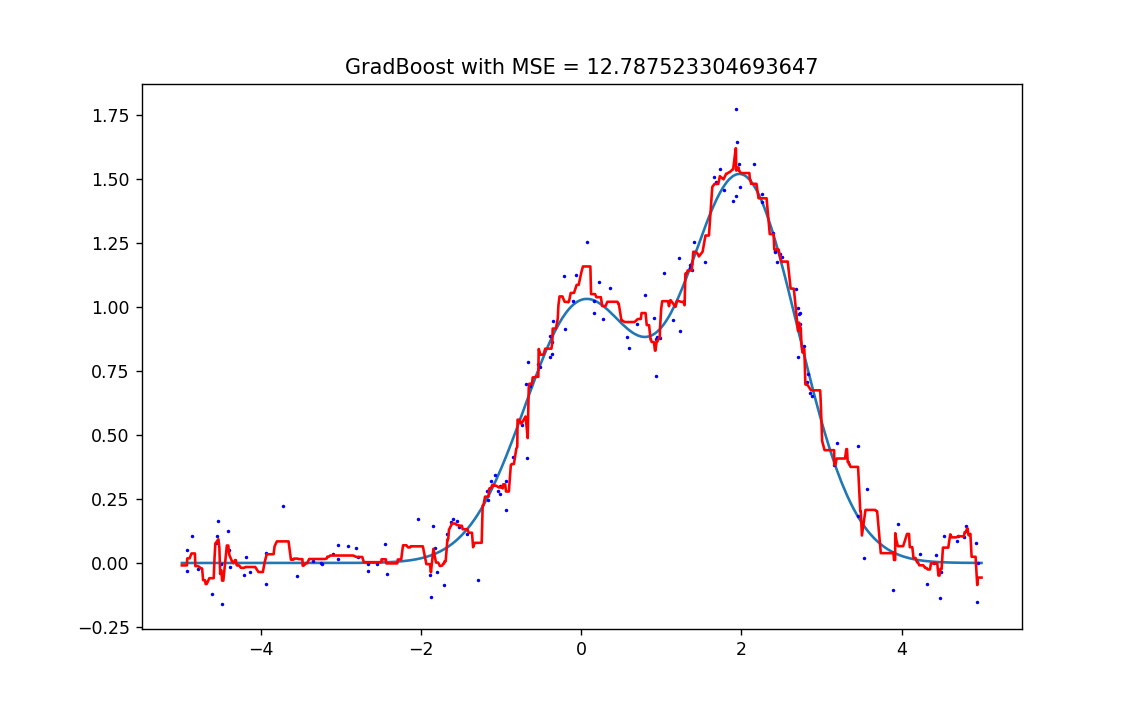

Text(0.5, 1.0, 'GradBoost with MSE = 12.787523304693647')

In [39]:
plt.plot(x_test, f(x_test))
plt.plot(x_train, y_train, 'bo', markersize=1)
plt.plot(x_test, grad_predict, 'r')
mse = np.sum((y_test - grad_predict) ** 2)
plt.title('GradBoost with MSE = {0}'.format(mse))

In [51]:
x_iris, y_iris = load_iris(return_X_y=True)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_iris_train, y_iris_train, x_iris_test, y_iris_test= train_test_split(x_iris, y_iris, test_size=0.3, random_state=125)

In [54]:
dt_clf.fit(x_iris_train, y_iris_train)

ValueError: Unknown label type: 'continuous-multioutput'

In [58]:
ada_clf.fit(x_iris_train, y_iris_train)

ValueError: bad input shape (45, 4)